# air pollution Notebook


This notebook covers:
- Loading the data
- data cleaning  and feature enginnering
- simple model


### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
# Applicable sklearn libraries
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split ,KFold,RandomizedSearchCV,GridSearchCV,cross_val_score

#preprocessing module
from sklearn.preprocessing import LabelEncoder


##feature Scaling
from sklearn.preprocessing import StandardScaler

# CatBoost
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor


import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

###  Data Assessing

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (30557, 82)
test data shape : (16136, 77)


In [4]:
# inspect train data
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# inspect test data
test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [6]:
# inspect data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

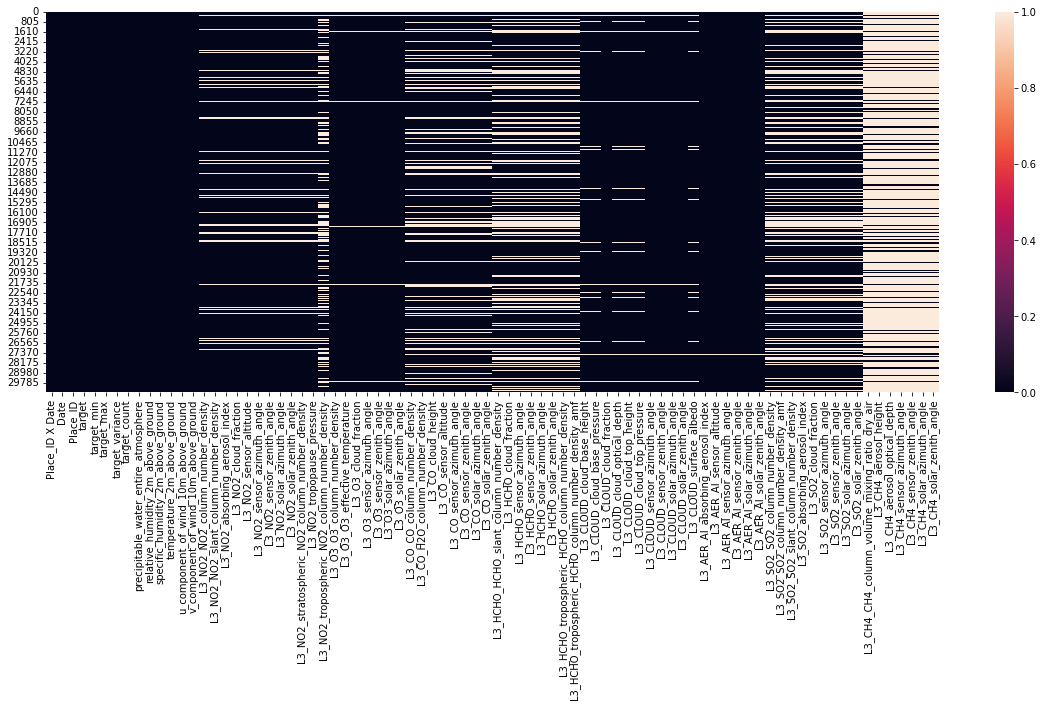

In [7]:
#check missing values in train data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(train.isnull(), vmin=0, vmax = 1)

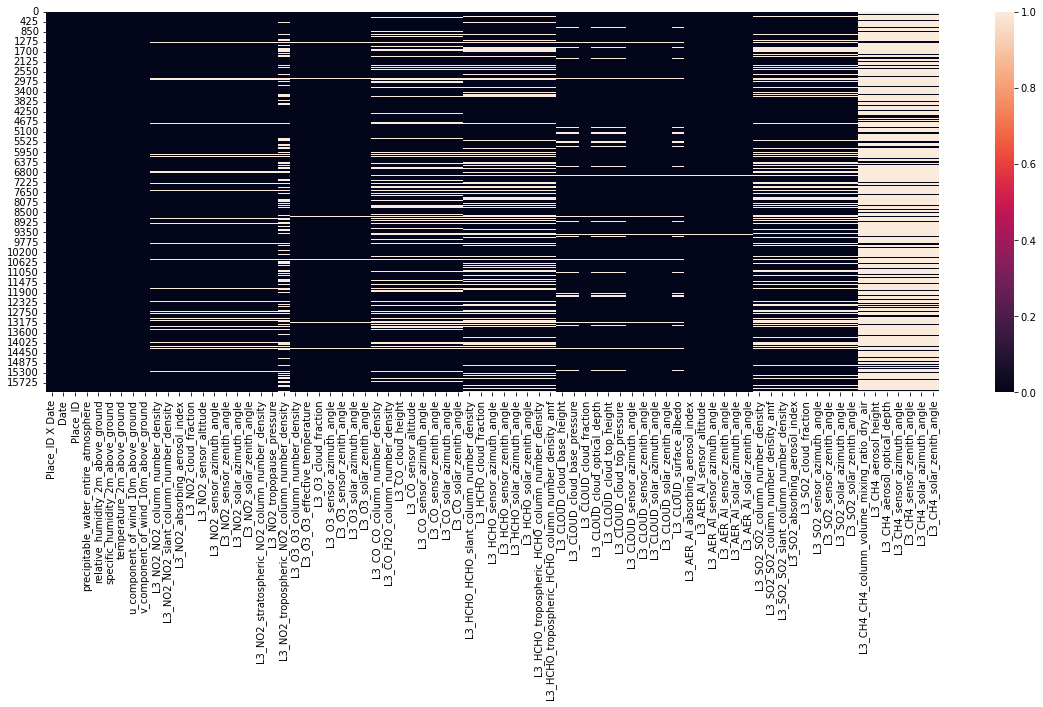

In [8]:
#check missing values in test data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(test.isnull(), vmin=0, vmax = 1)

- there seems to be missing data in both train ad test dataset

## Data Cleaning and Feature Engineering

In [9]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [10]:
train.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,26.924867,-94.638517,35.276196,174.185766,323.655582,-0.807377,-0.572627,1.814597,-13.907912,3.568212
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,22.720227,81.658648,23.894529,543.152037,1012.586874,0.398483,24.004049,9.762573,45.520712,14.341052
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,-1.000000,-179.880630,-1.000000,-1.000000,-1.000000,-1.000000,-105.367363,-1.000000,-179.947422,-1.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,0.618390,-163.148978,13.207215,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,26.846620,-145.556352,41.150417,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,48.493813,-1.000000,54.098409,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [11]:
train.isnull().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [12]:
test.isnull().sum()

Place_ID X Date                         0
Date                                    0
Place_ID                                0
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
                                       ..
L3_CH4_aerosol_optical_depth            0
L3_CH4_sensor_azimuth_angle             0
L3_CH4_sensor_zenith_angle              0
L3_CH4_solar_azimuth_angle              0
L3_CH4_solar_zenith_angle               0
Length: 77, dtype: int64

In [13]:
def radian_conv(degree):
    """
    Return radian.
    """
    return  np.radians(degree) 
train['L3_NO2_sensor_azimuth_angle'] = radian_conv(train['L3_NO2_sensor_azimuth_angle'])
train['L3_NO2_sensor_zenith_angle'] = radian_conv(train['L3_NO2_sensor_zenith_angle'])
train['L3_NO2_solar_azimuth_angle'] = radian_conv(train['L3_NO2_solar_azimuth_angle'])
train['L3_NO2_solar_zenith_angle'] = radian_conv(train['L3_NO2_solar_zenith_angle'])
train['L3_O3_sensor_azimuth_angle'] = radian_conv(train['L3_O3_sensor_azimuth_angle'])
train['L3_O3_sensor_zenith_angle'] = radian_conv(train['L3_O3_sensor_zenith_angle'])
train['L3_O3_solar_azimuth_angle'] = radian_conv(train['L3_O3_solar_azimuth_angle'])
train['L3_O3_solar_zenith_angle'] = radian_conv(train['L3_O3_solar_zenith_angle'])
train['L3_CO_sensor_azimuth_angle'] = radian_conv(train['L3_CO_sensor_azimuth_angle'])
train['L3_CO_sensor_zenith_angle'] = radian_conv(train['L3_CO_sensor_zenith_angle'])
train['L3_CO_solar_azimuth_angle'] = radian_conv(train['L3_CO_solar_azimuth_angle'])
train['L3_CO_solar_zenith_angle'] = radian_conv(train['L3_CO_solar_zenith_angle'])
train['L3_HCHO_sensor_azimuth_angle'] = radian_conv(train['L3_HCHO_sensor_azimuth_angle'])
train['L3_HCHO_sensor_zenith_angle'] = radian_conv(train['L3_HCHO_sensor_zenith_angle'])
train['L3_HCHO_solar_azimuth_angle'] = radian_conv(train['L3_HCHO_solar_azimuth_angle'])
train['L3_HCHO_solar_zenith_angle'] = radian_conv(train['L3_HCHO_solar_zenith_angle'])
train['L3_CLOUD_sensor_azimuth_angle'] = radian_conv(train['L3_CLOUD_sensor_azimuth_angle'])
train['L3_CLOUD_sensor_zenith_angle'] = radian_conv(train['L3_CLOUD_sensor_zenith_angle'])
train['L3_CLOUD_solar_azimuth_angle'] = radian_conv(train['L3_CLOUD_solar_azimuth_angle'])
train['L3_CLOUD_solar_zenith_angle'] = radian_conv(train['L3_CLOUD_solar_zenith_angle'])
train['L3_AER_AI_sensor_azimuth_angle'] = radian_conv(train['L3_CO_sensor_azimuth_angle'])
train['L3_AER_AI_sensor_zenith_angle'] = radian_conv(train['L3_CO_sensor_zenith_angle'])
train['L3_AER_AI_solar_azimuth_angle'] = radian_conv(train['L3_CO_solar_azimuth_angle'])
train['L3_AER_AI_solar_zenith_angle'] = radian_conv(train['L3_CO_solar_zenith_angle'])
train['L3_SO2_sensor_azimuth_angle'] = radian_conv(train['L3_SO2_sensor_azimuth_angle'])
train['L3_SO2_sensor_zenith_angle'] = radian_conv(train['L3_SO2_sensor_zenith_angle'])
train['L3_SO2_solar_azimuth_angle'] = radian_conv(train['L3_SO2_solar_azimuth_angle'])
train['L3_SO2_solar_zenith_angle'] = radian_conv(train['L3_SO2_solar_zenith_angle'])
train['L3_CH4_sensor_azimuth_angle'] = radian_conv(train['L3_CH4_sensor_azimuth_angle'])
train['L3_CH4_sensor_zenith_angle'] = radian_conv(train['L3_CH4_sensor_zenith_angle'])
train['L3_CH4_solar_azimuth_angle'] = radian_conv(train['L3_CH4_solar_azimuth_angle'])
train['L3_CH4_solar_zenith_angle'] = radian_conv(train['L3_CH4_solar_zenith_angle'])



test['L3_NO2_sensor_azimuth_angle'] = radian_conv(test['L3_NO2_sensor_azimuth_angle'])
test['L3_NO2_sensor_zenith_angle'] = radian_conv(test['L3_NO2_sensor_zenith_angle'])
test['L3_NO2_solar_azimuth_angle'] = radian_conv(test['L3_NO2_solar_azimuth_angle'])
test['L3_NO2_solar_zenith_angle'] = radian_conv(test['L3_NO2_solar_zenith_angle'])
test['L3_O3_sensor_azimuth_angle'] = radian_conv(test['L3_O3_sensor_azimuth_angle'])
test['L3_O3_sensor_zenith_angle'] = radian_conv(test['L3_O3_sensor_zenith_angle'])
test['L3_O3_solar_azimuth_angle'] = radian_conv(test['L3_O3_solar_azimuth_angle'])
test['L3_O3_solar_zenith_angle'] = radian_conv(test['L3_O3_solar_zenith_angle'])
test['L3_CO_sensor_azimuth_angle'] = radian_conv(test['L3_CO_sensor_azimuth_angle'])
test['L3_CO_sensor_zenith_angle'] = radian_conv(test['L3_CO_sensor_zenith_angle'])
test['L3_CO_solar_azimuth_angle'] = radian_conv(test['L3_CO_solar_azimuth_angle'])
test['L3_CO_solar_zenith_angle'] = radian_conv(test['L3_CO_solar_zenith_angle'])
test['L3_HCHO_sensor_azimuth_angle'] = radian_conv(test['L3_NO2_sensor_azimuth_angle'])
test['L3_HCHO_sensor_zenith_angle'] = radian_conv(test['L3_NO2_sensor_zenith_angle'])
test['L3_HCHO_solar_azimuth_angle'] = radian_conv(test['L3_NO2_solar_azimuth_angle'])
test['L3_HCHO_solar_zenith_angle'] = radian_conv(test['L3_NO2_solar_zenith_angle'])
test['L3_CLOUD_sensor_azimuth_angle'] = radian_conv(test['L3_CLOUD_sensor_azimuth_angle'])
test['L3_CLOUD_sensor_zenith_angle'] = radian_conv(test['L3_CLOUD_sensor_zenith_angle'])
test['L3_CLOUD_solar_azimuth_angle'] = radian_conv(test['L3_CLOUD_solar_azimuth_angle'])
test['L3_CLOUD_solar_zenith_angle'] = radian_conv(test['L3_CLOUD_solar_zenith_angle'])
test['L3_AER_AI_sensor_azimuth_angle'] = radian_conv(test['L3_AER_AI_sensor_azimuth_angle'])
test['L3_AER_AI_sensor_zenith_angle'] = radian_conv(test['L3_AER_AI_sensor_zenith_angle'])
test['L3_AER_AI_solar_azimuth_angle'] = radian_conv(test['L3_AER_AI_solar_azimuth_angle'])
test['L3_AER_AI_solar_zenith_angle'] = radian_conv(test['L3_AER_AI_solar_zenith_angle'])
test['L3_SO2_sensor_azimuth_angle'] = radian_conv(test['L3_SO2_sensor_azimuth_angle'])
test['L3_SO2_sensor_zenith_angle'] = radian_conv(test['L3_SO2_sensor_zenith_angle'])
test['L3_SO2_solar_azimuth_angle'] = radian_conv(test['L3_SO2_solar_azimuth_angle'])
test['L3_SO2_solar_zenith_angle'] = radian_conv(test['L3_SO2_solar_zenith_angle'])
test['L3_CH4_sensor_azimuth_angle'] = radian_conv(test['L3_CH4_sensor_azimuth_angle'])
test['L3_CH4_sensor_zenith_angle'] = radian_conv(test['L3_CH4_sensor_zenith_angle'])
test['L3_CH4_solar_azimuth_angle'] = radian_conv(test['L3_CH4_solar_azimuth_angle'])
test['L3_CH4_solar_zenith_angle'] = radian_conv(test['L3_CH4_solar_zenith_angle'])

In [14]:
# converting to datetime

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.week
train['day'] = train['Date'].dt.day

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['week'] = test['Date'].dt.week
test['day'] = test['Date'].dt.day

In [15]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (30557, 86)
test data shape : (16136, 81)


In [16]:
label_encoder =LabelEncoder() 
train['Place_ID']= label_encoder.fit_transform(train['Place_ID']) 
test['Place_ID']= label_encoder.fit_transform(test['Place_ID']) 

## Data preproccessing

In [18]:
train.drop(columns=['Place_ID X Date','Date','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)
test.drop(columns=['Place_ID X Date','Date'], axis=1, inplace=True)

In [19]:
X = train.drop('target',axis=1)
y = train.target

In [20]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)    

In [21]:
# Split train_data

X_Train, X_Val, y_Train, y_val = train_test_split(X,y, 
                                                  test_size = 0.1, random_state=42)

## model building using LGBM

In [22]:
lgbm = LGBMRegressor( learning_rate = 0.02,
    num_iterations= 30000,
    max_bins= 50, 
    max_depth =7 ,
    n_estimators= 1000,                    
    num_leaves = 70,
    feature_fraction= 0.64, 
    bagging_fraction= 0.8, 
    bagging_freq=1,
    metric= 'rmse' ,                     
    boosting_type = 'gbdt',
    min_data_in_leaf=5,
    reg_lambda =100, num_boost_round=10000,verbose_eval=500)

In [23]:
lgbm.fit(X_Train,y_Train)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.64,
              learning_rate=0.02, max_bins=50, max_depth=7, metric='rmse',
              min_data_in_leaf=5, n_estimators=1000, num_boost_round=10000,
              num_iterations=30000, num_leaves=70, reg_lambda=100,
              verbose_eval=500)

In [24]:
# Get the predicted result for the sample Data
pred= lgbm.predict(X_Val)

In [25]:
print("Error rate of lgbm regressor: ", mean_absolute_error(y_val, pred))

Error rate of lgbm regressor:  16.237996557133094


In [26]:
# Get the predicted result for the test Data
p2 = lgbm.predict(test)